In [1]:
import pandas as pd

In [2]:
# Create a grouped gene expression dataset
data = {
    "Gene": ["TP53", "TP53", "BRCA1", "BRCA1", "EGFR", "EGFR", "MYC", "MYC"],
    "Condition": ["Cancer", "Normal", "Cancer", "Normal", "Cancer", "Normal", "Cancer", "Normal"],
    "Expression": [8.5, 3.2, 7.2, 4.1, 9.1, 4.8, 8.9, 5.0]
}

df = pd.DataFrame(data)
df

,Gene,Condition,Expression
0,TP53,Cancer,8.5
1,TP53,Normal,3.2
2,BRCA1,Cancer,7.2
3,BRCA1,Normal,4.1
4,EGFR,Cancer,9.1
5,EGFR,Normal,4.8
6,MYC,Cancer,8.9
7,MYC,Normal,5.0


In [3]:
df.shape

(8, 3)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gene        8 non-null      object 
 1   Condition   8 non-null      object 
 2   Expression  8 non-null      float64
dtypes: float64(1), object(2)
memory usage: 324.0+ bytes


In [5]:
# Grouped Analysis

grouped = df.groupby(["Gene", "Condition"]) ["Expression"].mean().reset_index()
grouped

,Gene,Condition,Expression
0,BRCA1,Cancer,7.2
1,BRCA1,Normal,4.1
2,EGFR,Cancer,9.1
3,EGFR,Normal,4.8
4,MYC,Cancer,8.9
5,MYC,Normal,5.0
6,TP53,Cancer,8.5
7,TP53,Normal,3.2


In [6]:
# Reshaping Data

reshaped = grouped.pivot (index="Gene", columns="Condition", values="Expression")
reshaped

Condition,Cancer,Normal
Gene,,
BRCA1,7.2,4.1
EGFR,9.1,4.8
MYC,8.9,5.0
TP53,8.5,3.2


In [14]:
# Calculating the difference

reshaped["Expression_Difference"] = reshaped["Cancer"]-reshaped["Normal"]
reshaped

Condition,Cancer,Normal,Expression Difference,Expression_Difference
Gene,,,,
BRCA1,7.2,4.1,3.1,3.1
EGFR,9.1,4.8,4.3,4.3
MYC,8.9,5.0,3.9,3.9
TP53,8.5,3.2,5.3,5.3


In [15]:
reshaped.drop("Expression Difference", axis = 1, inplace = True)
reshaped

Condition,Cancer,Normal,Expression_Difference
Gene,,,
BRCA1,7.2,4.1,3.1
EGFR,9.1,4.8,4.3
MYC,8.9,5.0,3.9
TP53,8.5,3.2,5.3


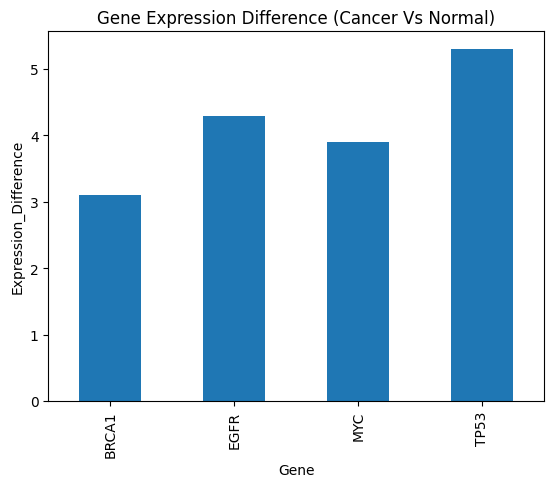

In [16]:
# Visualization

import matplotlib.pyplot as plt

reshaped["Expression_Difference"].plot(kind="bar")
plt.xlabel("Gene")
plt.ylabel("Expression_Difference")
plt.title("Gene Expression Difference (Cancer Vs Normal)")
plt.show()

## Interpretation

In this analysis, gene expression values were grouped by gene and condition
to compare cancer and normal samples. Genes such as EGFR and MYC show higher
expression levels in cancer compared to normal conditions. This project
demonstrates grouped biological data analysis and basic visualization using Python.
